<a href="https://colab.research.google.com/github/Vicente-Figueroa/deep_learning_projects/blob/main/fraud_detection_demo_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de detección de Fraude | Datos sinteticos

### Importar las librerias y los **datos**

In [8]:
# prompt: importa las librerias para hacer mineria de datos con pandas y visualización

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [9]:



# prompt: importa este csv PS_20174392719_1491204439457_log

df = pd.read_csv('PS_20174392719_1491204439457_log.csv')


## Revisión de la Estructura del DataFrame

### Primeras filas del DataFrame


In [10]:
df.shape

(6362620, 11)

In [11]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
# Nombre de las columnas y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
df_fraud = df[df['isFraud'] == 1]

In [14]:
# Número de filas con fraude
num_fraud = len(df_fraud)

# Seleccionar aleatoriamente filas con isFraud = 0
df_non_fraud = df[df['isFraud'] == 0].sample(n=(1500000 - num_fraud), random_state=42)  # ajusta el tamaño según sea necesario
# Combinar ambos DataFrames
df_reduced = pd.concat([df_fraud, df_non_fraud]).reset_index(drop=True)

In [15]:
# Verificar el tamaño del nuevo DataFrame
print("Tamaño del DataFrame reducido:", df_reduced.shape)

# Verificar la distribución de 'isFraud' en el nuevo DataFrame
print(df_reduced['isFraud'].value_counts())

Tamaño del DataFrame reducido: (1500000, 11)
isFraud
0    1491787
1       8213
Name: count, dtype: int64


In [16]:
df = df_reduced

### Análisis de Varianza y Estadísticas Descriptivas

In [17]:
# Estadísticas descriptivas de las columnas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,1500000.0,2.440606e+02,1.430421e+02,1.0,156.0000,240.000,3.360000e+02,7.430000e+02
amount,1500000.0,1.861301e+05,6.353027e+05,0.0,13496.9875,75491.495,2.100670e+05,6.988673e+07
oldbalanceOrg,1500000.0,8.407913e+05,2.901483e+06,0.0,0.0000,14541.000,1.096771e+05,5.958504e+07
newbalanceOrig,1500000.0,8.558878e+05,2.930802e+06,0.0,0.0000,0.000,1.430972e+05,4.958504e+07
oldbalanceDest,1500000.0,1.098844e+06,3.425592e+06,0.0,0.0000,130781.990,9.393328e+05,3.553814e+08
newbalanceDest,1500000.0,1.226899e+06,3.712063e+06,0.0,0.0000,214458.690,1.111109e+06,3.553805e+08
isFraud,1500000.0,5.475333e-03,7.379267e-02,0.0,0.0000,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,1500000.0,1.066667e-05,3.265970e-03,0.0,0.0000,0.000,0.000000e+00,1.000000e+00


In [18]:
# Columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns
print("Columnas numéricas:", columnas_numericas)

# Columnas no numéricas
columnas_no_numericas = df.select_dtypes(exclude=['number']).columns
print("Columnas no numéricas:", columnas_no_numericas)

Columnas numéricas: Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')
Columnas no numéricas: Index(['type', 'nameOrig', 'nameDest'], dtype='object')


#### Histogramas

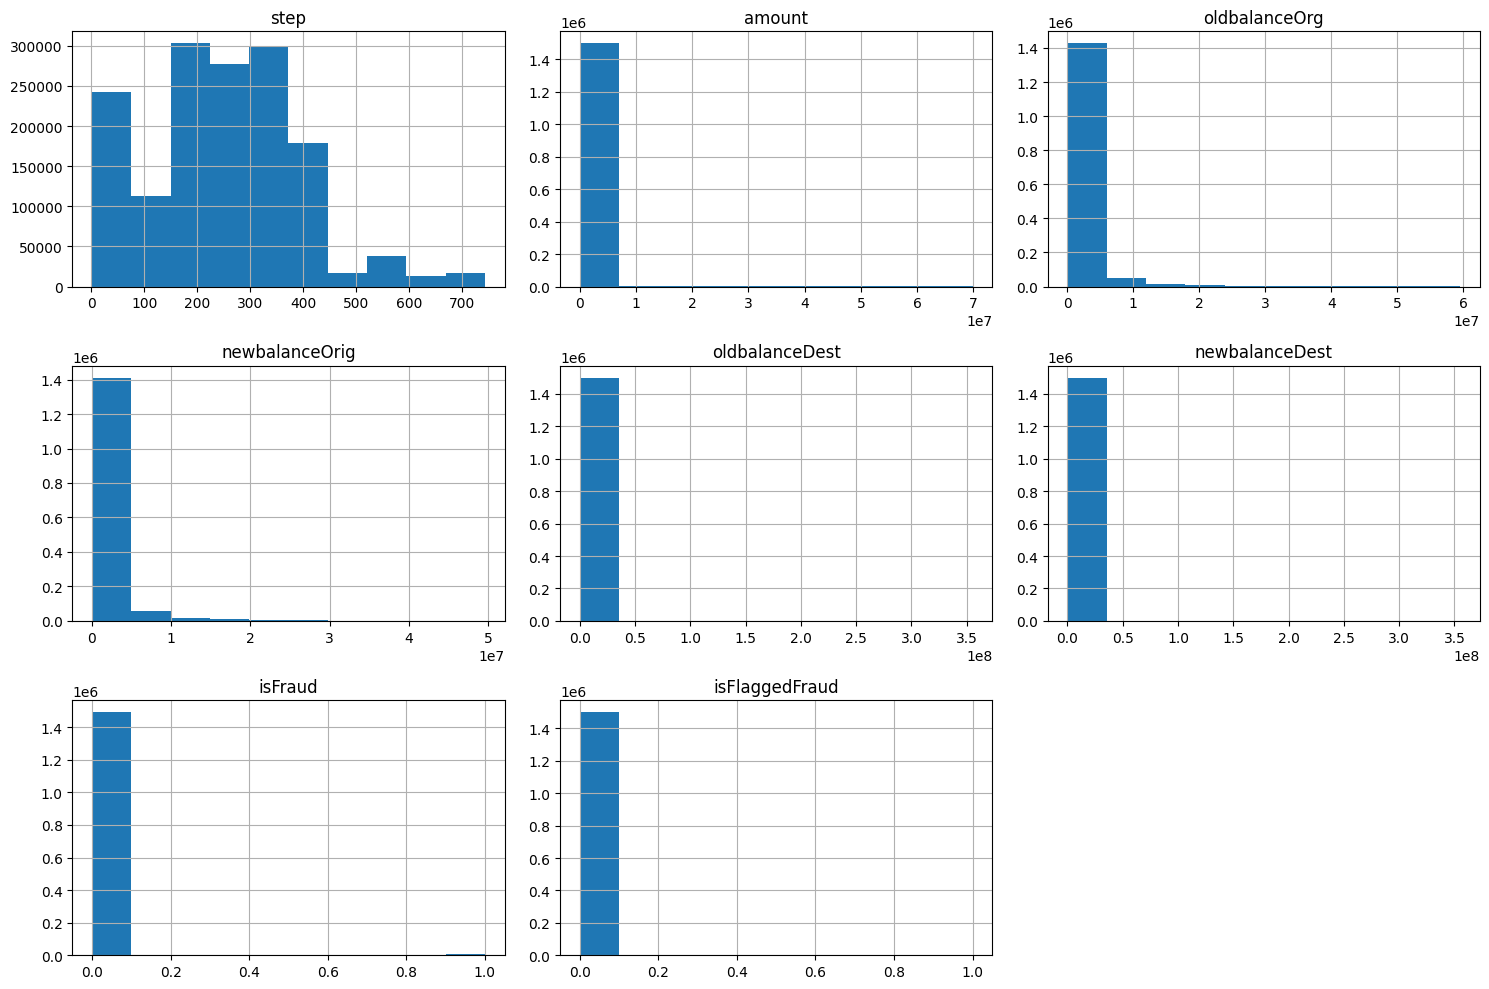

In [19]:
import matplotlib.pyplot as plt

# Histograma de cada columna numérica
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

#### Matriz de correlación

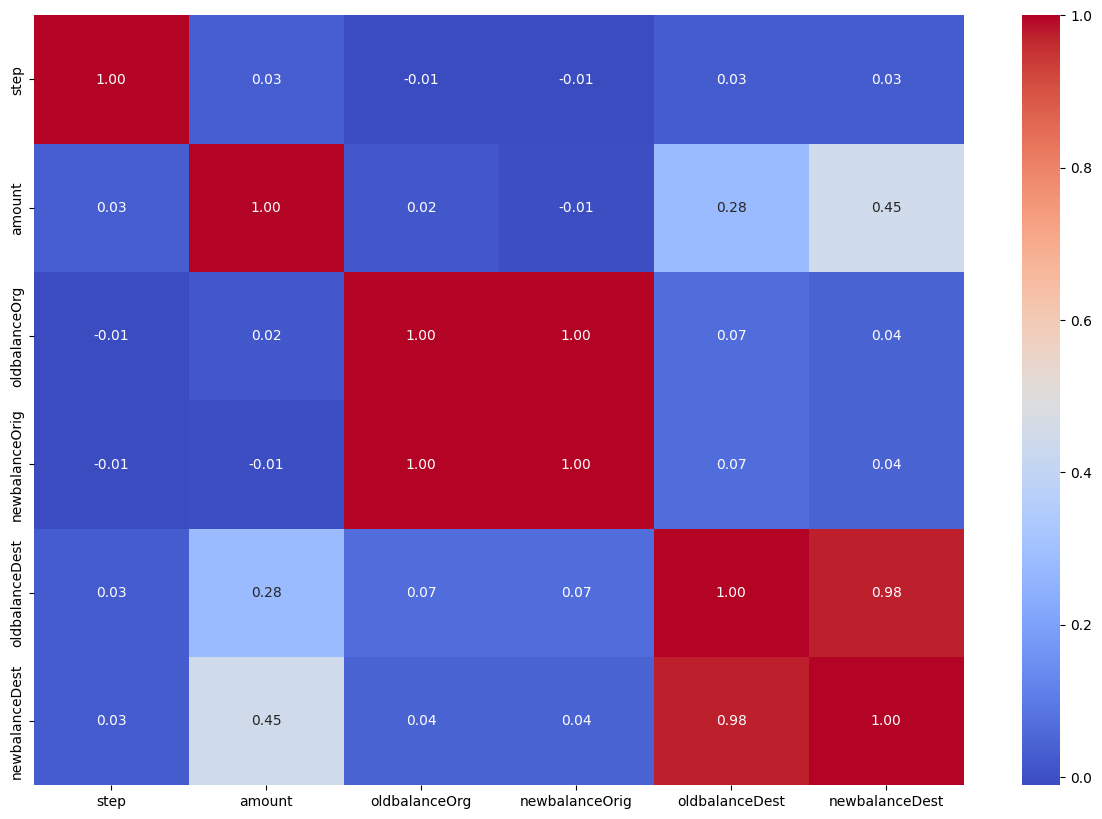

In [20]:
numerics = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
# Matriz de correlación
corr_matrix = df[numerics].corr()
# Visualización de la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [21]:
# Cantidad de valores nulos por columna
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


## Limpieza de datos

### Datos nulos

In [22]:
# Crear una copia del DataFrame original
df_clean = df.copy()

# Eliminar las filas con valores nulos
df_clean = df_clean.dropna()

### Identificar y Corregir Data Skew en las Variables Numéricas


In [23]:
# Calcular skewness de las columnas numéricas
skewness = df_clean.skew(numeric_only=True)

# Identificar columnas con skewness significativa (umbral de 0.75 como ejemplo)
skewed_columns = skewness[skewness > 0.75].index
print("Columnas con skew significativo:", skewed_columns)

Columnas con skew significativo: Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [24]:
skewed_columns = skewed_columns.drop('isFraud', errors='ignore')


In [25]:

# Calcular skewness de las columnas numéricas
skewness = df_clean.skew(numeric_only=True)

# Identificar columnas con skewness NO significativa (umbral de 0.75 como ejemplo)
no_skewed_columns = skewness[skewness <= 0.75].index
print("Columnas SIN skew significativo:", no_skewed_columns)


Columnas SIN skew significativo: Index(['step'], dtype='object')


In [26]:
# Aplicar la transformación logarítmica a las columnas skewed
df_clean[skewed_columns] = np.log1p(df_clean[skewed_columns])

# Nombre del paso
log_transformed = df_clean[skewed_columns]

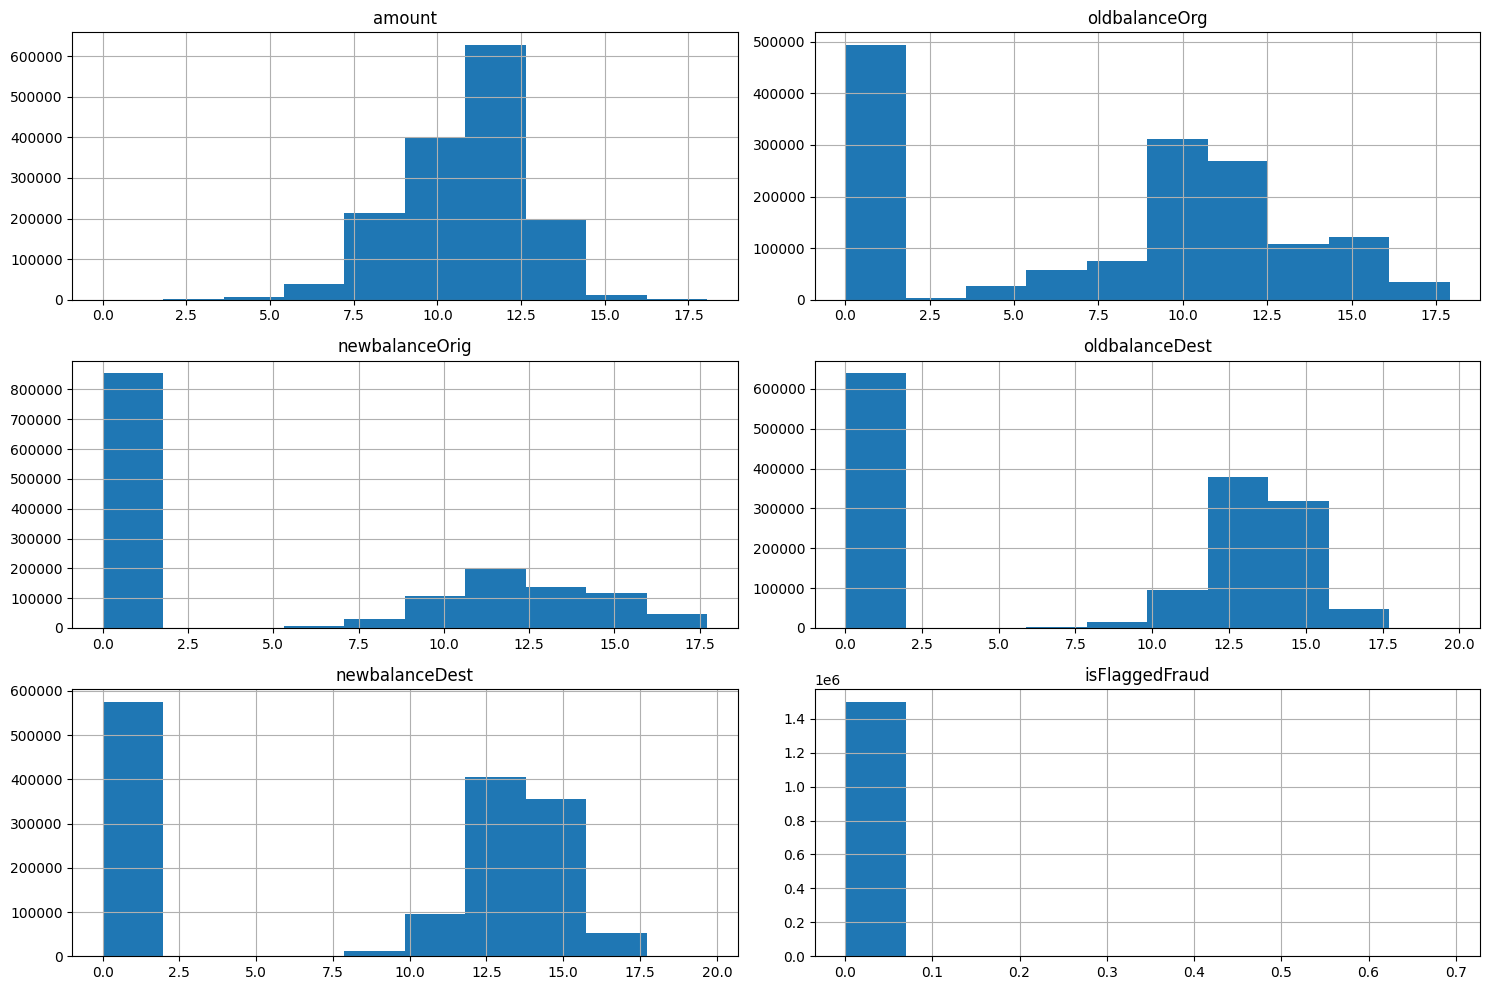

In [27]:
# Histograma de cada columna numérica
log_transformed.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

### Matriz de correlación

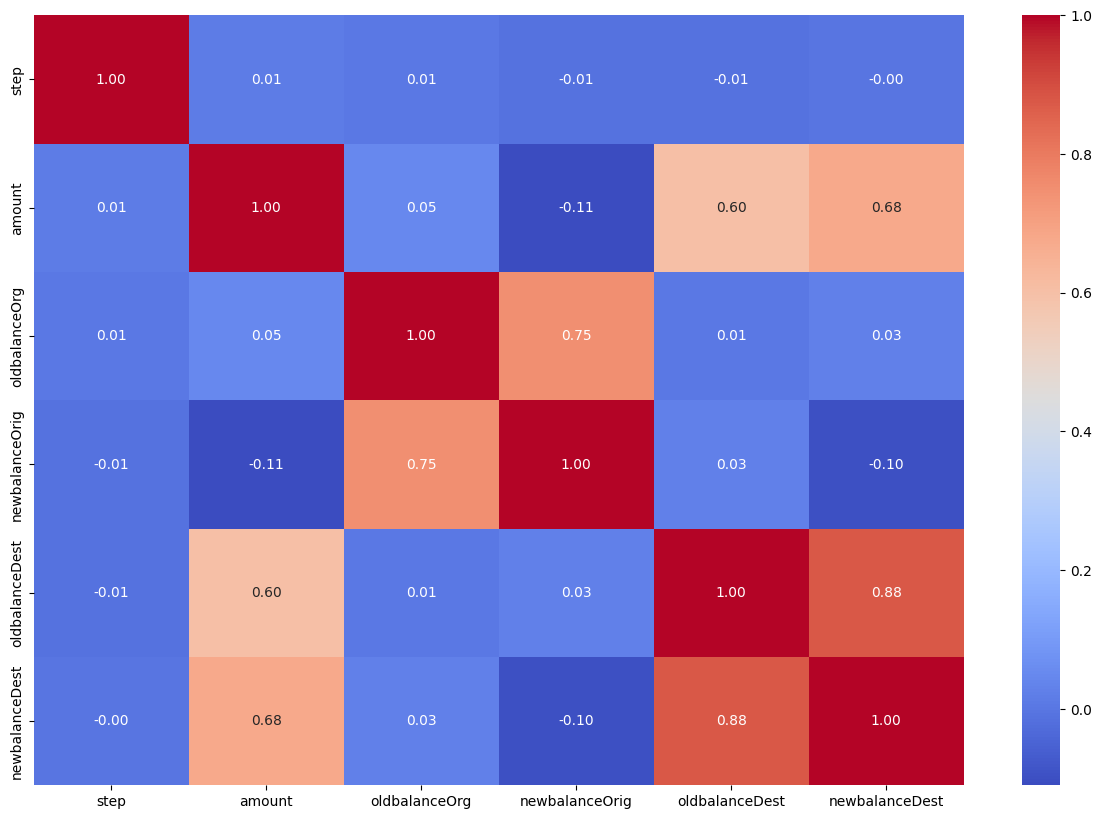

In [28]:
# Matriz de correlación
corr_matrix = df_clean[numerics].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Análisis de la Diferencia entre oldbalanceOrg y newbalanceOrig

In [29]:
# Crear una nueva columna que represente la diferencia
df_clean['balance_difference'] = df_clean['oldbalanceOrg'] - df_clean['newbalanceOrig']

# Verificar si la diferencia coincide con el monto de la transacción
df_clean['is_amount_correct'] = np.isclose(df_clean['balance_difference'], df_clean['amount'])

# Proporción de filas donde la diferencia coincide con el monto
proporcion_correcta = df_clean['is_amount_correct'].mean()
print("Proporción de filas donde la diferencia coincide con el monto:", proporcion_correcta)

Proporción de filas donde la diferencia coincide con el monto: 0.005357333333333334


### Tratamiento de columnas no numericas

In [30]:
# Aplicar One-Hot Encoding a la columna 'type'
df_clean = pd.get_dummies(df_clean, columns=['type'], drop_first=True)

In [31]:
# Eliminar columnas 'nameOrig' y 'nameDest'
df_clean = df_clean.drop(columns=['nameOrig', 'nameDest'])

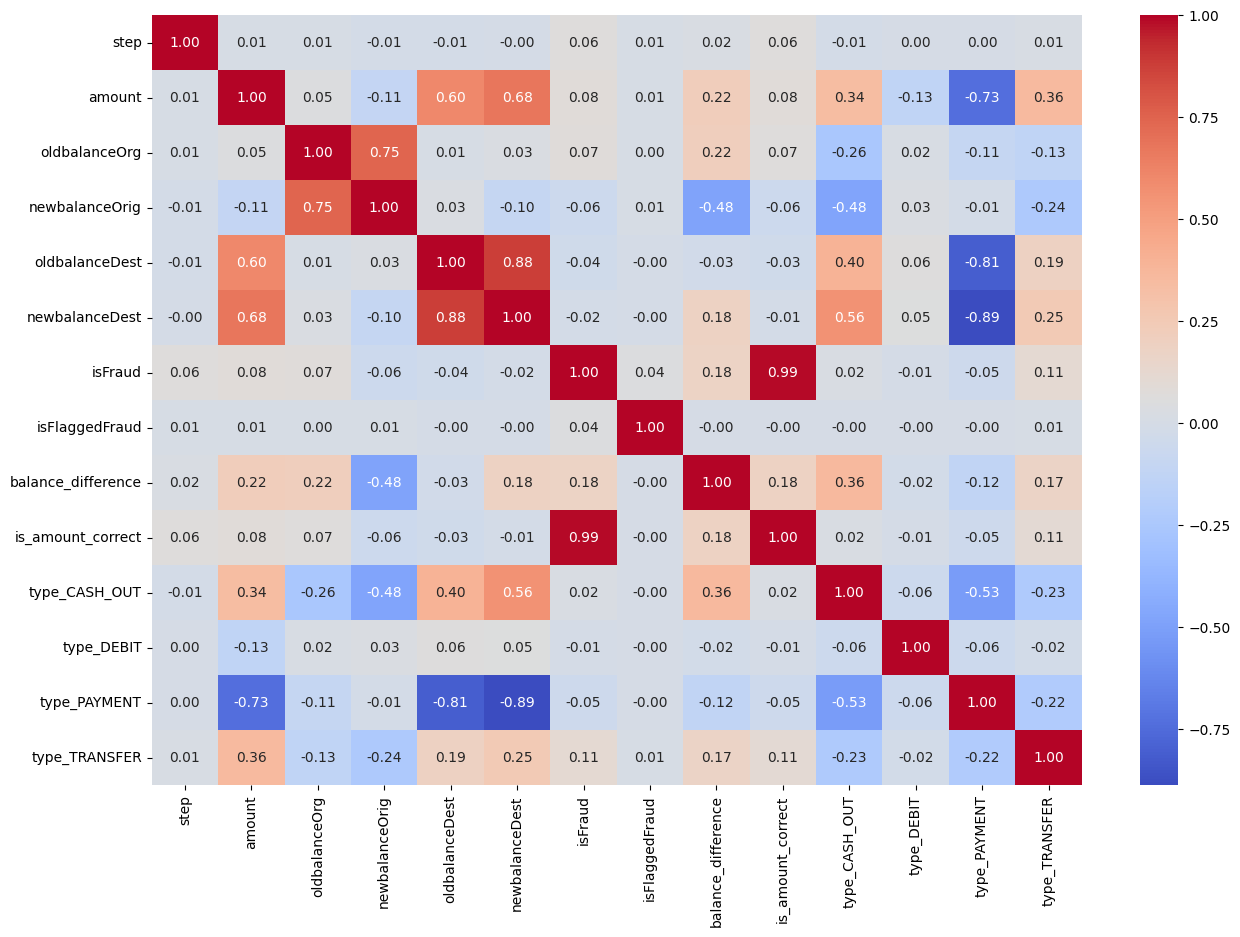

In [32]:
# Matriz de correlación actualizada
corr_matrix = df_clean.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Analisis de la columna objetivo

In [33]:
# Análisis de la frecuencia de la columna 'isFraud'
fraud_counts = df_clean['isFraud'].value_counts()
fraud_percentages = df_clean['isFraud'].value_counts(normalize=True) * 100

print("Frecuencia de 'isFraud':")
print(fraud_counts)
print("\nPorcentaje de 'isFraud':")
print(fraud_percentages)

Frecuencia de 'isFraud':
isFraud
0    1491787
1       8213
Name: count, dtype: int64

Porcentaje de 'isFraud':
isFraud
0    99.452467
1     0.547533
Name: proportion, dtype: float64


### Oversampling para balancear la carga

In [34]:
from sklearn.utils import resample

# Crear un DataFrame con todas las transacciones fraudulentas
fraud_df = df_clean[df_clean['isFraud'] == 1]

# Crear un DataFrame con todas las transacciones no fraudulentas
non_fraud_df = df_clean[df_clean['isFraud'] == 0]

# Sobremuestreo de la clase minoritaria (fraude)
fraud_upsampled = resample(fraud_df,
                           replace=True,  # con reemplazo
                           n_samples=int(len(non_fraud_df)/8),  # igual número de muestras que no fraude
                           random_state=42)  # para reproducibilidad

# Combinar las clases balanceadas
df_balanced = pd.concat([fraud_upsampled, non_fraud_df])

# Revisar el tamaño y la distribución de las clases en el DataFrame balanceado
print("Tamaño del DataFrame balanceado:", df_balanced.shape)
print(df_balanced['isFraud'].value_counts())

Tamaño del DataFrame balanceado: (1678260, 14)
isFraud
0    1491787
1     186473
Name: count, dtype: int64


In [35]:
# Análisis de la frecuencia de la columna 'isFraud'
fraud_counts = df_balanced['isFraud'].value_counts()
fraud_percentages = df_balanced['isFraud'].value_counts(normalize=True) * 100

print("Frecuencia de 'isFraud':")
print(fraud_counts)
print("\nPorcentaje de 'isFraud':")
print(fraud_percentages)

Frecuencia de 'isFraud':
isFraud
0    1491787
1     186473
Name: count, dtype: int64

Porcentaje de 'isFraud':
isFraud
0    88.888909
1    11.111091
Name: proportion, dtype: float64


In [36]:
df_balanced.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'balance_difference',
       'is_amount_correct', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')

## Preparación del dataset para entrenamiento

In [37]:
from sklearn.model_selection import train_test_split

# Separar características y la columna objetivo
X_bal = df_balanced.drop(columns=['isFraud','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'balance_difference','is_amount_correct'])
y_bal = df_balanced['isFraud']

# Dividir en conjunto de entrenamiento y prueba
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

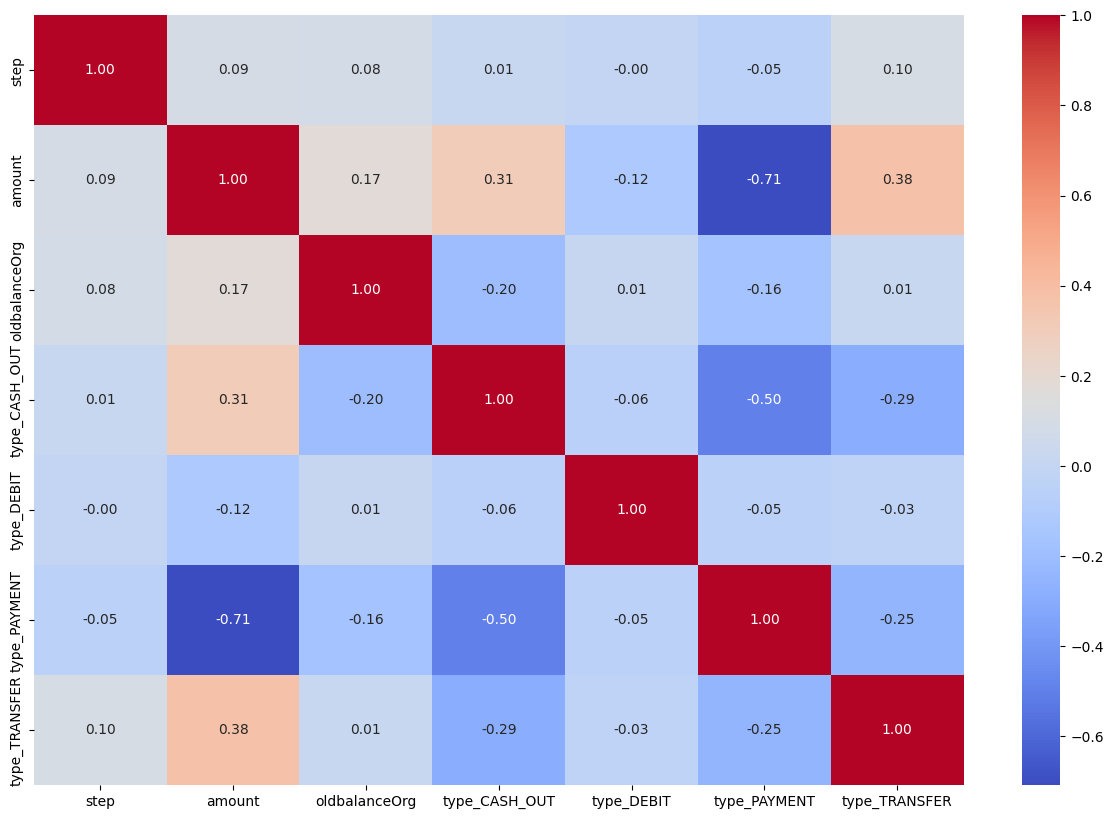

In [38]:
# Matriz de correlación actualizada
corr_matrix = X_bal.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Prueba de los distintos modelos

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Inicializar el modelo
logreg = LogisticRegression(random_state=42, class_weight={1:0.99,0:0.01 })

# Entrenar el modelo
logreg.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_logreg = logreg.predict(X_test_bal)

# Métricas de evaluación
print("Logistic Regression:")
print(classification_report(y_test_bal, y_pred_logreg))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88    447536
           1       0.36      1.00      0.53     55942

    accuracy                           0.80    503478
   macro avg       0.68      0.89      0.70    503478
weighted avg       0.93      0.80      0.84    503478



In [41]:
# Inicializar el modelo
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Entrenar el modelo
xgb.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_xgb = xgb.predict(X_test_bal)

# Métricas de evaluación
print("XGBoost:")
print(classification_report(y_test_bal, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:11:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    447536
           1       0.98      1.00      0.99     55942

    accuracy                           1.00    503478
   macro avg       0.99      1.00      0.99    503478
weighted avg       1.00      1.00      1.00    503478



### Matriz de confusión

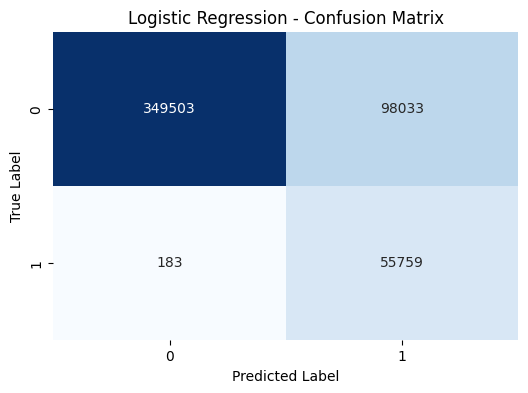

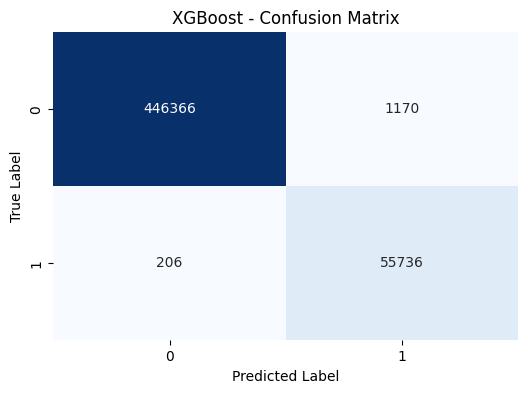

In [42]:
# Función para trazar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Logistic Regression
plot_confusion_matrix(y_test_bal, y_pred_logreg, 'Logistic Regression - Confusion Matrix')

# XGBoost
plot_confusion_matrix(y_test_bal, y_pred_xgb, 'XGBoost - Confusion Matrix')

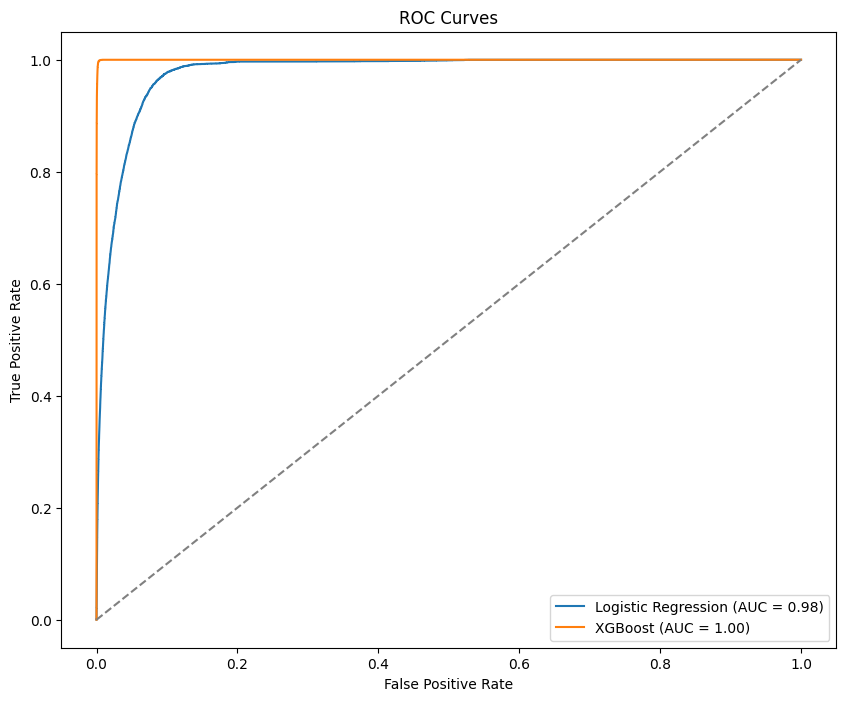

In [43]:
# Calcular probabilidades para las curvas ROC de Logistic Regression y XGBoost
y_pred_logreg_proba = logreg.predict_proba(X_test_bal)[:, 1]
y_pred_xgb_proba = xgb.predict_proba(X_test_bal)[:, 1]

# Calcular las curvas ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test_bal, y_pred_logreg_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_bal, y_pred_xgb_proba)

# Calcular el AUC
auc_logreg = roc_auc_score(y_test_bal, y_pred_logreg_proba)
auc_xgb = roc_auc_score(y_test_bal, y_pred_xgb_proba)

# Trazar las curvas ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [44]:
!pip install lightgbm

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 130531, number of negative: 1044251
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 1174782, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111111 -> initscore=-2.079444
[LightGBM] [Info] Start training from score -2.079444
Tiempo de ejecución para LightGBM: 14.77 segundos


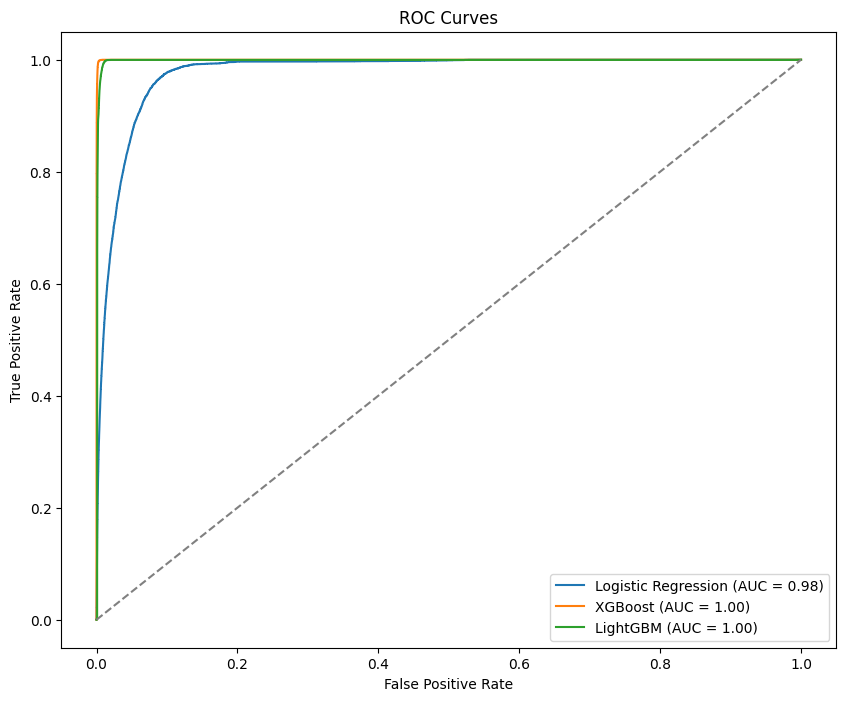

In [45]:
import lightgbm as lgb
import time
from sklearn.metrics import roc_curve, roc_auc_score

# Iniciar el timer
start_time = time.time()

# Inicializar el modelo LightGBM
lgbm = lgb.LGBMClassifier(random_state=42)

# Entrenar el modelo LightGBM
lgbm.fit(X_train_bal, y_train_bal)

# Predicciones con LightGBM
y_pred_lgbm = lgbm.predict(X_test_bal)
y_pred_lgbm_proba = lgbm.predict_proba(X_test_bal)[:, 1]  # Probabilidades para LightGBM

# Calcular el tiempo total
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Tiempo de ejecución para LightGBM: {elapsed_time:.2f} segundos")

# Calcular la curva ROC para LightGBM
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test_bal, y_pred_lgbm_proba)
auc_lgbm = roc_auc_score(y_test_bal, y_pred_lgbm_proba)

# Trazar la curva ROC junto con Logistic Regression y XGBoost
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

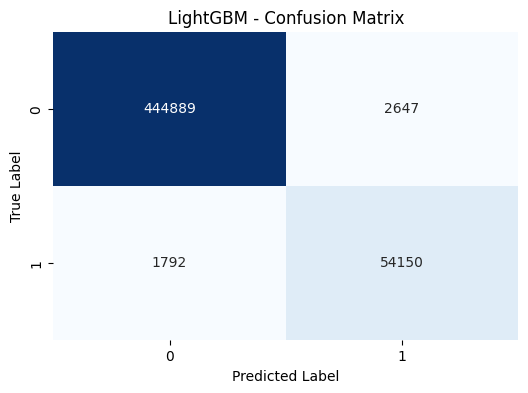

In [46]:
plot_confusion_matrix(y_test_bal, y_pred_lgbm, 'LightGBM - Confusion Matrix')